# MIDTERM CS370 

## PROBLEM SET 1: BAYESIAN LEARNING AND INFERENCE (TAKE HOME PROBLEM)

### PS1.1: Learning the bent coin experiment (15 points)

Consider a bent coin that has a probability of 0.7 of landing heads and a probability of 0.3 of landing tails. The coin is flipped m times. The sequence of heads and tails is recorded / observed and a hypothetical receiver needs to estimate the probability of heads from the experimental data.


####  PS1.1-1 (2.5 points)

What is the entropy in bits of the bent coin? Explain why its < 1 bits. 



Entropy: H(p)= Sum_i[p(x_i) log_2(1/p(x_i))]
Heads: 0.7
Tails: 0.3

0.7*log_2(1/0.7)+ 0.3*log_2(1/0.3)
0.881 bit

Entropy is the average number of uncertainty or surprise to a variable's possible outcome. For example, if it is a fair coin toss, the entropy is 1 bit, indicating maximum uncertainity of the outcome of the coin toss, you can't get more efficient than by encoding Heads, H, as ethier 0 or 1 bit, and Tails, T, as the other. However, in this case, Heads, H, has a probabilty of 0.7, and Tails, T, has a probability of 0.3, then there is less uncertainty of the outcome of an event. In this case, H occurs more frequent, so it makes sense that we encode H with less "bits", for any probability we want to yield, like P(HH), than T, therefore making the entropy less than 1 bit.


#### PS1.1-2 (2.5 points)

Plot the entropy of the sequence of heads and tails as m increases for m=1 to m=500 in steps of 50?

Text(0, 0.5, 'entropy(H(p))')

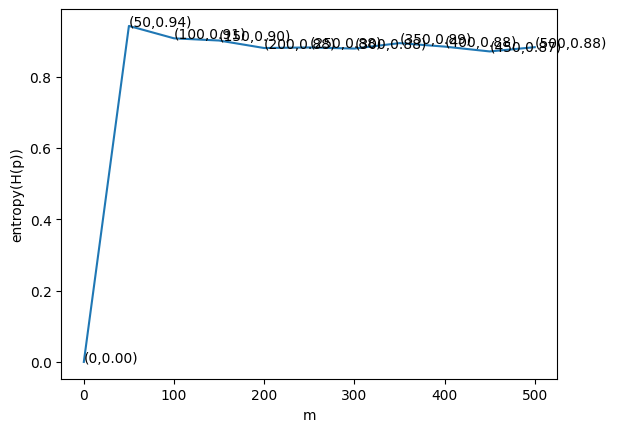

In [1]:
from matplotlib import pyplot as plt
import random as random
import math

coin=[]
head=0
tail=0

entropy_list=[]

def entropy(head, tail): #get the entropy
    entropy= head*(math.log(1.0/head)/ math.log(2))+ tail*(math.log(1.0/tail)/math.log(2))
    return entropy

for i in range(0,500): #create sample, P(H)=0.7
   rand= random.randint(0,9)
   if rand<7:
        coin.append('h')
   else:
        coin.append('t')

entropy_list.append(0) #0 uncertainty when there is 1 coin flip
    
for i in range(len(coin)):
    
    toss= coin[i]
        
    if toss=='h':
        head+=1
    else:
        tail+=1
        
    if i%49==0 and i!=0: #for every fifty coin flip
     head_per= head/(i+1.0)
     tail_per= tail/(i+1.0)
    
     entro= entropy(head_per, tail_per)
     entropy_list.append(entro) #append entropy
    
x=[0,50,100,150,200,250,300,350,400,450,500]

plt.plot(x, entropy_list) #plot
for xy in zip(x,entropy_list):
    plt.annotate('(%s,%.2f)' % xy, xy=xy, textcoords='data')
    
plt.xlabel("m")
plt.ylabel("entropy(H(p))")


#### PS1.1-3 (10 points)

The receiver is given the sequence of heads and tails and must use the Bayes rule to estimate the probability of heads. As a parenthesis, if we know this parameter then we we can infer / predict the next binary event but this is not the focus here. 

The prior probability distribution is assumed to be beta and to solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.5) titled "Bayesian Parameter Learning". You are asked to estimate and plot the **mean of the posterior probability distribution** of the probability of heads as a function of the probability of heads given the sequence of heads and tails where m=[0,1, 2, 3, 4, 5, 10, 20, 50, 100]. 

You can use the scipy.stats library to help you out. To get full points you need to document extensively your code and explain the results. Note that you have to produce except from the 10 plots, a table with the mean and variance where the columns will be $m$, mean, var.



In [2]:
#pip install tabulate
#for printing the table

Posterior distribution: [mean, standard deviation]  [0, 0.5, 0.1889822365046136]


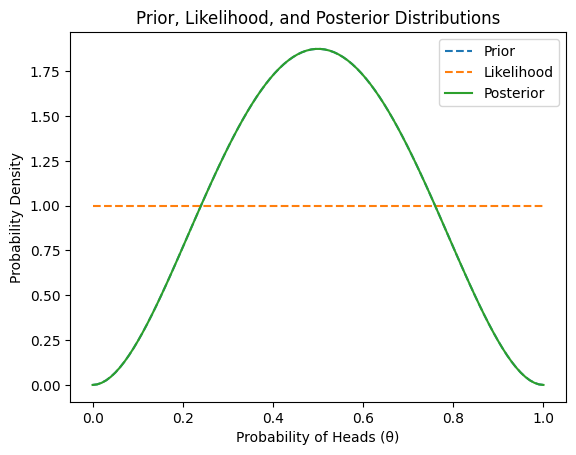

Posterior distribution: [mean, standard deviation]  [1, 0.5714285714285714, 0.1749635530559413]


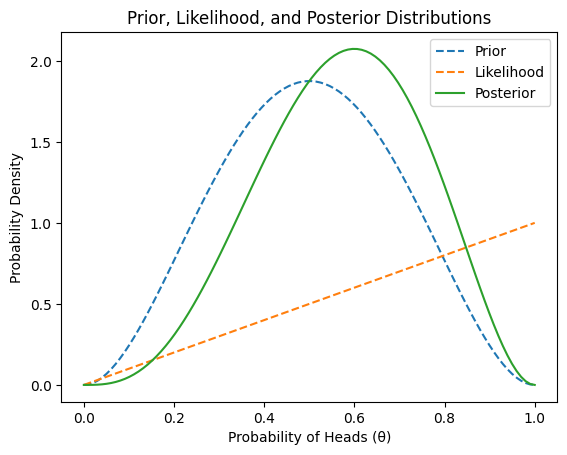

Posterior distribution: [mean, standard deviation]  [2, 0.5, 0.16666666666666666]


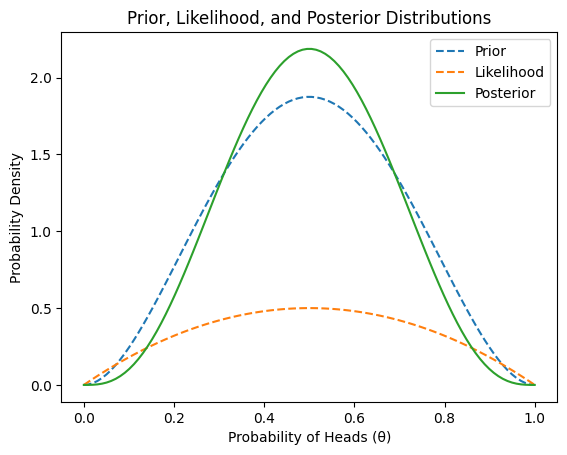

Posterior distribution: [mean, standard deviation]  [3, 0.5555555555555556, 0.15713484026367722]


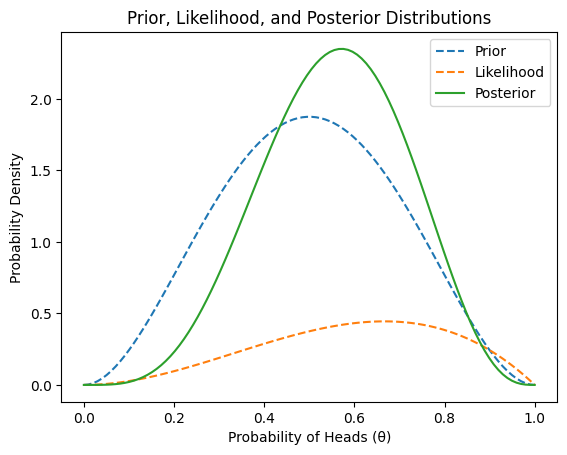

Posterior distribution: [mean, standard deviation]  [4, 0.5, 0.15075567228888181]


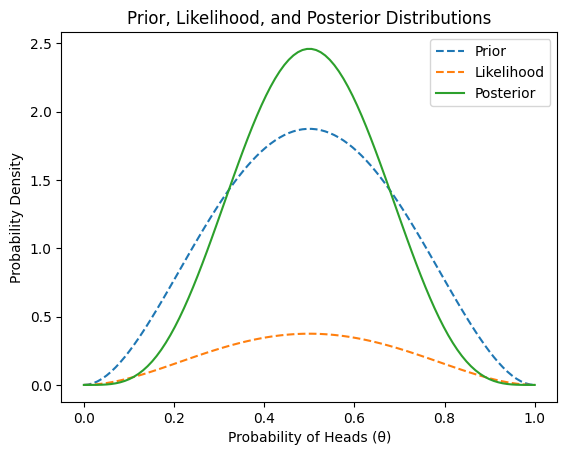

Posterior distribution: [mean, standard deviation]  [5, 0.5454545454545454, 0.14373989364401724]


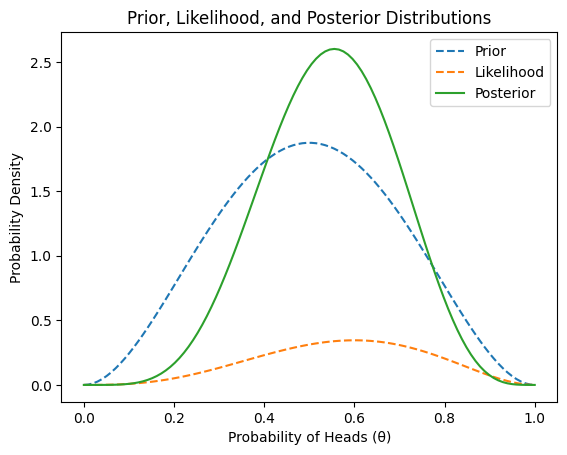

Posterior distribution: [mean, standard deviation]  [10, 0.6875, 0.11241827096632835]


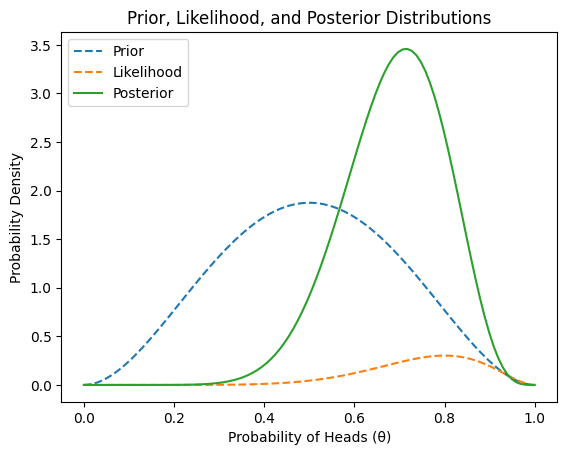

Posterior distribution: [mean, standard deviation]  [20, 0.6538461538461539, 0.09155677472490834]


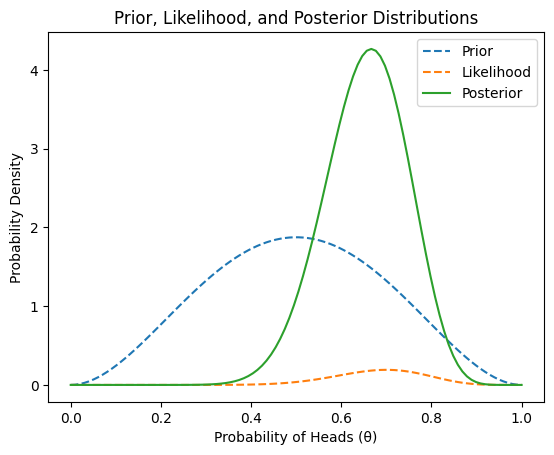

Posterior distribution: [mean, standard deviation]  [50, 0.625, 0.06412364700532212]


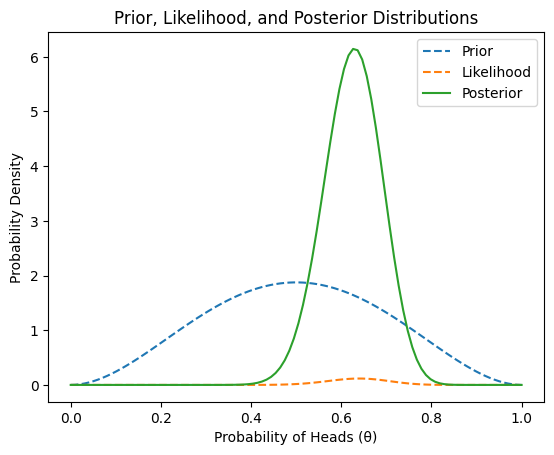

Posterior distribution: [mean, standard deviation]  [100, 0.660377358490566, 0.0457828175420606]


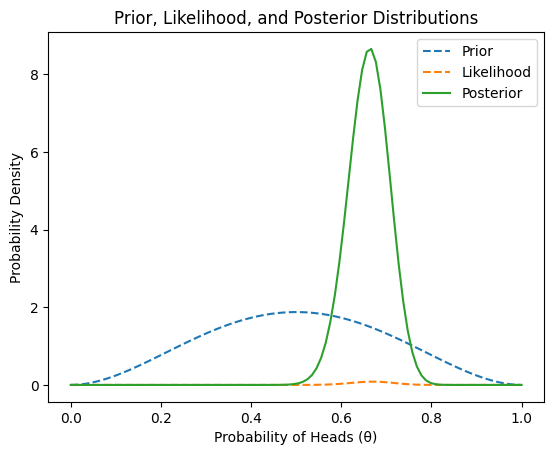

+-----+----------+----------------------+
|   m |     Mean |   Standard Deviation |
+=====+==========+======================+
|   0 | 0.5      |            0.188982  |
+-----+----------+----------------------+
|   1 | 0.571429 |            0.174964  |
+-----+----------+----------------------+
|   2 | 0.5      |            0.166667  |
+-----+----------+----------------------+
|   3 | 0.555556 |            0.157135  |
+-----+----------+----------------------+
|   4 | 0.5      |            0.150756  |
+-----+----------+----------------------+
|   5 | 0.545455 |            0.14374   |
+-----+----------+----------------------+
|  10 | 0.6875   |            0.112418  |
+-----+----------+----------------------+
|  20 | 0.653846 |            0.0915568 |
+-----+----------+----------------------+
|  50 | 0.625    |            0.0641236 |
+-----+----------+----------------------+
| 100 | 0.660377 |            0.0457828 |
+-----+----------+----------------------+


In [3]:
import numpy as np
from scipy.stats import beta, binom
from tabulate import tabulate as tab
#beta- continous random variable
#binom- probability

#Prior of a fair coin toss [initial assumption of coin distribution]
#shape parameters
prior_alpha = 3.0 #assumes that the coin is a fair distribution
prior_beta = 3.0
prior = beta(prior_alpha, prior_beta) #fair coin toss, fiar distribution, probablity 0.5

mean_stan=[]
#calculating mean and variance of the posterior data in the normal distribution
def distribution(m, a, b):
    #mean= alpha/(aplha+beta)
    #variance= alpha*beta/((alpha+beta)^2*(alpha+beta+1))
    
    mean= a/(a+b)
    variance= a*b/ (math.pow(a+b,2)*(a+b+1))
    
    stan_deviation= math.sqrt(variance)
    
    return [m,mean,stan_deviation]

#m=[0,1,2,3,4,5,10,20,50,100]
m=[0,1,2,3,4,5,10,20,50,100]
#calculating number of heads for each m

for i in m:
    heads=0 #initial head count
    tails=0 #initial tail count
    rounds= i #number of tosses
    
    for j in range(i): #calculating the number of head occurences
        toss=coin[j]
        if toss=='h':
            heads+=1
        else:
            tails+=1
    
    #Probility of heads occuring given the data in relation to m as a normal distribution
    likelihood= binom.pmf(heads, rounds, np.linspace(0,1,100))
    
    
    #Posterior distribution using Baye's Theorem
    #updated probability distribution after taking into account 
    #both the observed data m and prior beliefs 
    posterior_alpha= prior_alpha+ heads
    posterior_beta= prior_beta+ tails
    
    posterior= beta(posterior_alpha, posterior_beta)
    
    #calculate and print the mean and standard deviation
    mean_stan.append(distribution(i, posterior_alpha, posterior_beta))
    print('Posterior distribution: [mean, standard deviation] ', distribution(i,posterior_alpha, posterior_beta))
    
        
    #plot in terms of a normal distribution
    x = np.linspace(0, 1, 100) #normal distribution

    plt.plot(x, prior.pdf(x), label='Prior', linestyle='--') #plot the assumption
    plt.plot(x, likelihood, label='Likelihood', linestyle='--') #plot the probability
    plt.plot(x, posterior.pdf(x), label='Posterior') #plot the posterior
    plt.title('Prior, Likelihood, and Posterior Distributions')
    plt.xlabel('Probability of Heads (θ)')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()
    
#printing the table
header=['m','Mean','Standard Deviation']
table= tab(mean_stan, header, tablefmt="grid")
print(table)

### PS1.2 Bayesian Linear Regression (15 points)

#### PS1.2-1 Dataset (2.5 points)

Generate a dataset of $m$ data points identical to the example of Figure 4.1 in GERON but modify the code such that you can produce results for the very small (eg 3 data points), low $m$ (eg 10 data points) and larger $m$ (eg 100 data points) cases. 

In [4]:
from platform import python_version
print(python_version())

#using python version 3.8.18
#Compatible with bambi and pymc
#Not compatible with upper versions

3.8.18


In [5]:
#np.random.seed(42)  # to make this code example reproducible
m =[3,10,100]# number of instances

#generate N=m amount of points in the domain from start-stop
#randomness determined by the mean and standard deviation
def generate(start,stop,N,mean,std):
  np.random.seed(42)
  X = np.linspace(start,stop,N)  # column vector, normal distrbution from start-stop
  y = 4 + 3 * X + np.random.RandomState(42).normal(mean, std, N)  # column vector
    
  #plt.scatter(X,y)
  return X,y


In [24]:
import seaborn as sns
import pandas as pd
import bambi as bmb

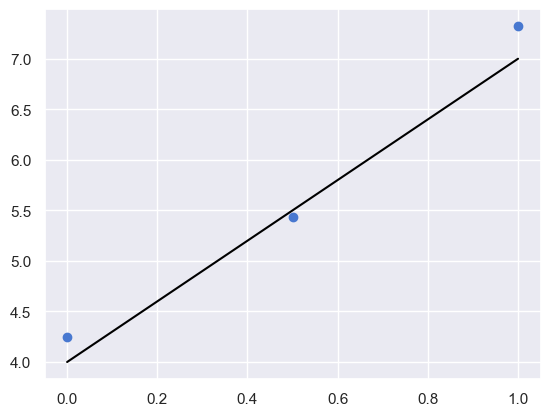

In [31]:
#Generate 3 points, with standard deviation of 0.5
#declarations
start=0
stop=1
N=3
mean=0
std=0.5

#original line [slope=3, intercept=4]
real_x, real_y= generate(start,stop,100,0,0)
plt.plot(real_x,real_y, color="black")

X,y=generate(start, stop, N, mean, std)
plt.scatter(X,y)

#### PS1.2-2 Bayesian  Regression  (12.5 points)

To solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.6) titled "Bayesian Linear Regression". You can also look at the code [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py). 

Replicate the the Figure 20.7 (a) and (b) shown below. You dont have to replicate the exact examples but you have to generate two figures. The first should show the predictive distribution for the case of small data (sparsity) eg $m=3$ and the second when we have more data eg $m=10$.  Confidence intervals should be shown using the exaxt same standard deviations (1-3 $\sigma$) as in the figure.

![](Fig_20_07.png)

Significant number of points will be subtracted if the code presented is not well documented and if the results are not explained. Use markdown cell and markdown to write a tutorial like treatment of the problem even if this entails copying the equations from the book.

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [y_sigma, Intercept, x]


Sampling 1 chain for 500 tune and 100 draw iterations (500 + 100 draws total) took 2 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


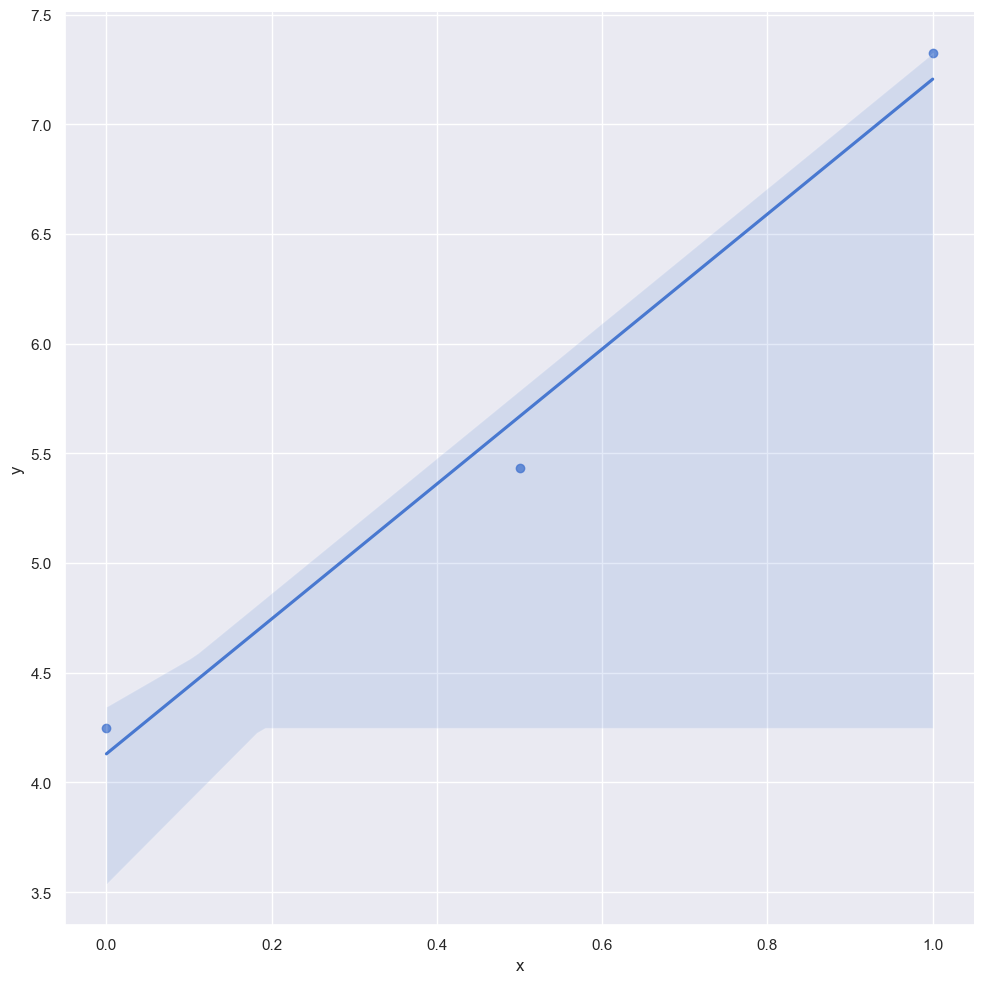

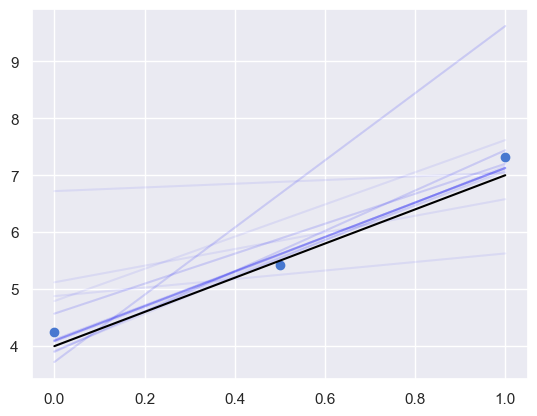

In [32]:
N=3
#make frames into data points using pandas DataFrame
d={'x':X, 'y': y}
points= pd.DataFrame(data=d)
#print(points)

#Plot of regression fit and original regression line
sns.lmplot(x="x", y="y", data=points, height=10)

#takes a formula linear model specifier and creates a design matrix
#bambi adds random variables for each coefficients and an appropraite likelihood of the model
def regression_model(points, iterations=100):
    #Bambi model of the data, given the sample N points
    model= bmb.Model("y ~ x", points)

    #Using NUTS (No-U-Turn Samper) to carry out the actual inference
    trace= model.fit(
        draws= iterations,
        tune=500,
        discard_tuned_samples=True,
        chains=1,
        progressbar=True)

    return trace
    

#plot the regressions
def regression(trace, points, N):
    #multiple plots for linear regressions
    fig, ax= plt.subplots()

    #scatter the N points
    ax.scatter(points['x'], points['y'])

    #x-values
    x=np.linspace(0,1,N)
    
    #extract posterior slope and intercept draws from the regression_model
    intercepts= trace.posterior.Intercept.to_numpy()[0]
    slopes= trace.posterior.x.to_numpy()[0]

    #sample twenty random intercepts and slopes according to index
    sample_indexes= np.random.randint(len(intercepts), size=20)
    #extract the sample
    for i in sample_indexes:
        #plot
        y= intercepts[i]+slopes[i]*x
        ax.plot(x,y, c='blue',alpha=0.07)
    ax.plot(real_x, real_y, color='black')


#call to function
trace= regression_model(points)
regression(trace, points, N)


               


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [y_sigma, Intercept, x]


Sampling 1 chain for 500 tune and 100 draw iterations (500 + 100 draws total) took 2 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


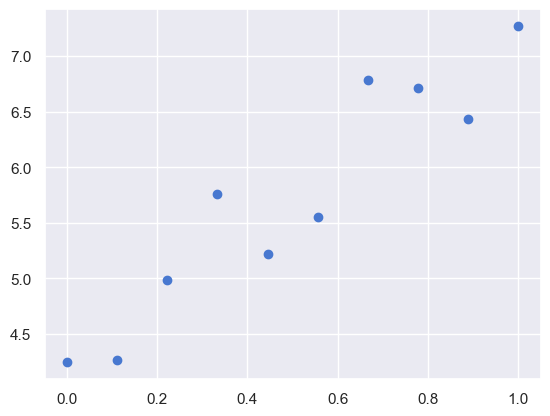

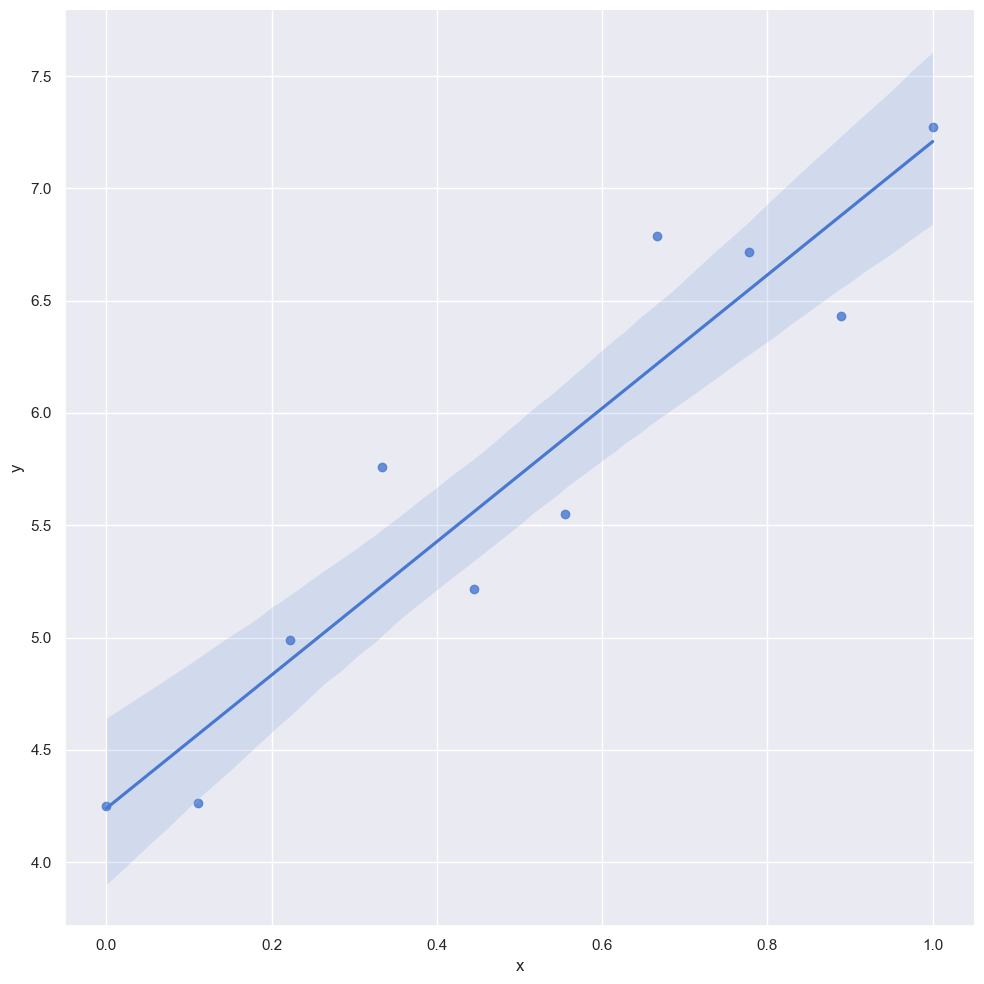

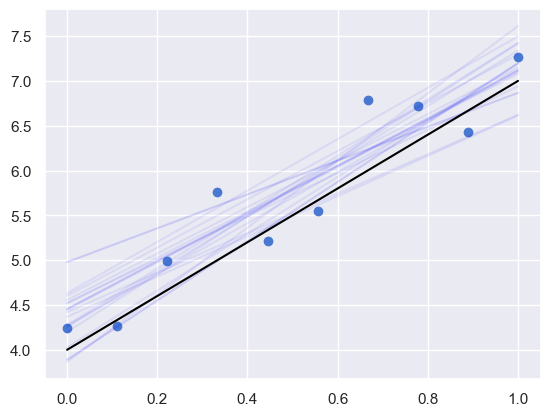

In [30]:
#generate N=m=10 points
N=10
mean=0
std=0.5

X,y=generate(start, stop, N, mean, std)
plt.scatter(X,y)
d={'x':X, 'y': y}
points= pd.DataFrame(data=d)
sns.lmplot(x="x", y="y", data=points, height=10)

trace= regression_model(points)
regression(trace, points, N)

Conclusion:
By the Bayesian Linear Regression, we can see that there is large uncertainty in the location of the regression line as sample by the Bayesian Model for m=3 points, but it gets narrower as m increases, and at a fixed range for m=10 points.